# Extracción de datos: Colonias — Delimitaciones Geoestadísticas (INEGI)

## 1. Descripción general

Esta notebook forma parte del proyecto [**Relacion Baches Accidentes HMO**](https://github.com/Ingenieria-de-Caracteristicas-MCD/Relacion_Baches_Accidentes_HMO). 

En esta etapa se trabaja con el conjunto de datos **Colonias — Delimitaciones Geoestadísticas**, publicado por el **INEGI**, disponible públicamente en:


🔗 [https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=794551132180](https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=794551132180)


El conjunto contiene información geoespacial sobre las delimitaciones de colonias urbanas y rurales en México.  

Cada polígono incluye atributos como:
- Claves geoestadísticas (`CVE_ENT`, `CVE_MUN`, `CVE_LOC`)  
- Nombre de la colonia o localidad  
- Identificadores de entidad y municipio

### 1.1 Objetivo de esta notebook

Documentar el proceso automatizado de:
1. **Descargar** el archivo ZIP oficial de delimitaciones de colonias desde INEGI.  
2. **Extraer y filtrar** los polígonos correspondientes a **Hermosillo, Sonora (CVE_ENT=26, CVE_MUN=30, CVE_LOC=0001)**.  
3. **Guardar** el resultado filtrado en formato `GeoJSON` dentro de `data/interim/geo/`.

El flujo completo utiliza los siguientes scripts:
- `src/download_colonias.py`  
- `src/extract_colonias.py`


## 2. Configuración del entorno

A continuación se importan las funciones y rutas necesarias para ejecutar el flujo completo de extracción de los datos de colonias.

El archivo `src/config.py` define las rutas base del proyecto, mientas que los módulos `src/download_colonias.py` y `src/extract_colonias.py` contienen la lógica de descarga y extracción respectivamente.

In [1]:
import sys
from pathlib import Path

import pandas as pd
import geopandas as gpd

In [2]:
SRC_DIR = Path().resolve().parent / "src"

if str(SRC_DIR) not in sys.path: 
    sys.path.insert(0, str(SRC_DIR))

# for x in sys.path: print(x)

In [3]:
from config import ROOT_DIR, RAW_DIR, INTERIM_DIR
from download_colonias import download_colonias
from extract_colonias import process_extraction_colonias

# Verificación de rutas
print("Raw data directory:", RAW_DIR.relative_to(ROOT_DIR), RAW_DIR.exists(), RAW_DIR.is_dir())
print("Interim data directory:", INTERIM_DIR.relative_to(ROOT_DIR), INTERIM_DIR.exists(), INTERIM_DIR.is_dir())


Raw data directory: data\raw True True
Interim data directory: data\interim True True


## 3. Descarga del archivo ZIP

El script `src/download_colonias.py` descarga el archivo ZIP de delimitaciones geoespaciales desde el sitio oficial del INEGI. 

Una vez validada la integridad del archivo, se guarda en `data/raw/geo/colonias`. 

In [4]:
# Descarga del archivo ZIP de colonias
zip_path = download_colonias()

2025-10-13 13:34:12,397 - INFO - download_colonias.py - Inicia proceso de descarga de Colonias (INEGI)

Descargando 794551132180_s.zip: 100%|##########| 71.6M/71.6M [02:10<00:00, 550kB/s] 
2025-10-13 13:36:24,666 - INFO - download_colonias.py - Descarga finalizada en 132.27 s

2025-10-13 13:36:24,668 - INFO - download_colonias.py - Archivos descargados:


 - data\raw\geo\colonias\794551132180_s.zip



## 4. Extracción y filtrado de Hermosillo

El script `extract_colonias.py` realiza las siguientes operaciones: 

1. Extrae el archivo ZIP descargado en `data/raw/geo/colonias`. 
2. Busca los archivos `.shp` (shapefiles) generados durante la extracción. 
3. Filtra únicamente las colonias pertenecientes a: 
    - **Entidad:** Sonora (`CVE_ENT = 26`)
   - **Municipio:** Hermosillo (`CVE_MUN = 30`)
   - **Localidad:** Urbana (`CVE_LOC = 0001`)

4. Guarda el resultado filtrado en formato `GeoJSON` dentro de `data/interim/geo/colonias_hmo.geojson`

* **Nota**: Si se ejecuta con el parámetro `clean=True`, se eliminarán ZIP originales una vez finalizado el proceso. 

In [5]:
# Extracción y filtrado de las colonias de Hermosillo
colonias_hmo_path = process_extraction_colonias(clean=False)

2025-10-13 13:37:40,069 - INFO - extract_colonias.py - Inicia proceso de extracción: 

2025-10-13 13:37:41,204 - INFO - utils.py - ZIP 794551132180_s.zip extraído -> data\raw\geo\colonias\794551132180_s
2025-10-13 13:37:45,122 - INFO - extract_colonias.py - Archivo data\raw\geo\colonias\794551132180_s\conjunto_de_datos\00as.shp filtrado -> data\interim\geo\colonias_hmo.geojson
2025-10-13 13:37:45,227 - INFO - extract_colonias.py - Proceso de extracción completado en 5.16 s



## 5. Verificación rápida del resultado

A continuación, se carga el archivo `colonias_hmo.geojson` para verificar que la estructura y los campos sean correctos. 

En este punto, se espera que todas las geometrías correspondan a polígonos ubicados dentro del municipio de Hermosillo, Sonora.

In [6]:
gdf_colonias = gpd.read_file(colonias_hmo_path)
gdf_colonias.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_ASEN,CP,FECHA_ACT,INSTITUCIO,NOM_ASEN,TIPO,Shape_Leng,Shape_Area,geometry
0,2603000010001,26,30,1,0001,83290,11/2021,"DIRECCIÓN DE CATASTRO, HERMOSILLO",Y GRIEGA,BARRIO,3242.570807,588003.672042,"POLYGON ((1628676.8721 1912677.5061, 1628689.3..."
1,2603000010002,26,30,1,0002,83170,11/2021,"DIRECCIÓN DE CATASTRO, HERMOSILLO",22 DE SEPTIEMBRE,COLONIA,1490.542076,91522.382755,"POLYGON ((1625114.3645 1920744.8705, 1625108.2..."
2,2603000010003,26,30,1,0003,83010,11/2021,"DIRECCIÓN DE CATASTRO, HERMOSILLO",5 DE MAYO,COLONIA,2741.592650,412142.736606,"POLYGON ((1630682.5375 1918370.9371, 1630673.8..."
3,2603000010004,26,30,1,0004,83295,11/2021,"DIRECCIÓN DE CATASTRO, HERMOSILLO",ADOLFO DE LA HUERTA,COLONIA,1894.537972,170764.281316,"POLYGON ((1628569.4325 1911347.8023, 1628586.3..."
4,2603000010005,26,30,1,0005,83170,11/2021,"DIRECCIÓN DE CATASTRO, HERMOSILLO",ADOLFO LÓPEZ MATEOS,COLONIA,4004.081803,664894.362011,"POLYGON ((1625720.7663 1921397.8375, 1625718.8..."


In [9]:
len(gdf_colonias)

744

In [11]:
gdf_colonias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CVEGEO      744 non-null    object  
 1   CVE_ENT     744 non-null    int32   
 2   CVE_MUN     744 non-null    int32   
 3   CVE_LOC     744 non-null    int32   
 4   CVE_ASEN    744 non-null    object  
 5   CP          744 non-null    object  
 6   FECHA_ACT   744 non-null    object  
 7   INSTITUCIO  744 non-null    object  
 8   NOM_ASEN    744 non-null    object  
 9   TIPO        744 non-null    object  
 10  Shape_Leng  744 non-null    float64 
 11  Shape_Area  744 non-null    float64 
 12  geometry    744 non-null    geometry
dtypes: float64(2), geometry(1), int32(3), object(7)
memory usage: 67.0+ KB


<Axes: >

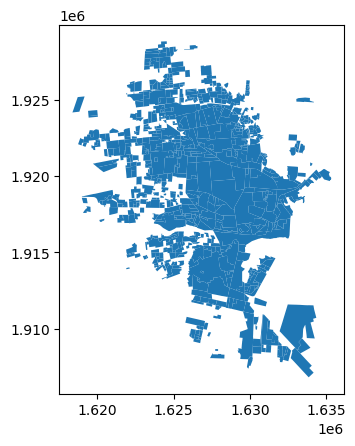

In [13]:
gdf_colonias['geometry'].plot(aspect='equal')


## 6. Ejecución desde la terminal

En caso de preferir la ejecución directa desde la terminal, los scripts pueden correrse individualmente:

### 6.1 Descargar el archivo ZIP de colonias

```bash
python src/download_colonias.py
```

Guarda el archivo descargado en: `data/raw/geo/colonias`

### 6.2 Extraer y foltrar las colonias de Hermosillo

```bash
python src/extract_colonias.py
```

Este comnado: 

* Descomprime el archivo descargado. 
* Filtra los polígonos correspondientes a Hermosillo (`CVE_ENT=26`, `CVE_MUN=30`, `CVE_LOC=0001`)
* Guarda el resultado en formato `GeoJSON` dentro de `data/interim/geo`
* Si se ejecuta con `clean=True` dentro del script, eliina el ZIP original tras la extracción

### 6.3 Flujo completo

En caso de querer correr ambos pasos consecutivamente:

```bash
python src/download_colonias.py && python src/extract_colonias.py
```

## 7. Conclusión

En esta notebook se documentó el flujo completo de **extracción de datos geoespaciales de colonias (INEGI)**:

- Se descargó el conjunto de delimitaciones geoestadísticas de colonias.  
- Se extrajo y filtró la información correspondiente a Hermosillo, Sonora.  
- Se generó un archivo `GeoJSON` limpio que servirá como base para el análisis espacial de baches y accidentes en zonas urbanas.

Estos datos permitirán integrar la capa de colonias con los eventos de **baches reportados (Bachómetro)** y **accidentes viales (ATUS)** para la posterior correlación espacial.
